# <center><b> <em> Exploratory Data Analysis </em> </b></center>

### <font color="green"> | - Import des Biblio et Dataframe</font>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
# Définir une fonction de conversion pour la colonne datetime
def parse_datetime(date_string):
    return pd.to_datetime(date_string)

# Spécifier les types de données et les convertisseurs
dtype = {'invoice': str, 'object': int, 'stock_code': object, 'description': object, 'quantity': int, 'unit_price': float, 'customer_id': object, 'country': object}
converters = {'invoice_date': parse_datetime}

# Charger le fichier CSV en utilisant les types de données et les convertisseurs
data = pd.read_csv("../data/silver.csv", dtype=dtype, converters=converters)

invoice                 object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id             object
country                 object
dtype: object


In [23]:
data.shape

(1033036, 8)

In [65]:
data.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [63]:
df_churn_custmer = pd.read_csv("../data/df_churn_custmer.csv")

In [40]:
df_churn_custmer.head()

,customer_id,payed_amount,refund_amount,pourcentage
0,12346.0,77353.96,-77287.10,99.913566
1,12347.0,4921.53,0.00,0.000000
2,12348.0,2019.40,0.00,0.000000
3,12349.0,4428.69,-24.15,0.545308
4,12350.0,334.40,0.00,0.000000


In [69]:
mixed_data = pd.read_csv("../data/mixed_data.csv")

In [70]:
mixed_data.head()

,customer_id,recency,frequency,monetary,pourcentage,country
0,12346.0,326,4,66.86,99.913566,United Kingdom
1,12347.0,3,8,4921.53,0.000000,Iceland
2,12348.0,76,5,2019.40,0.000000,Finland
3,12349.0,19,4,4404.54,0.545308,Italy
4,12350.0,311,1,334.40,0.000000,Norway


### <font color="green"> || - Numerical Variable Analysis : </font>

In [64]:
data.describe()

,quantity,unit_price
count,1.033036e+06,1.033036e+06
mean,1.007688e+01,4.613980e+00
std,1.751976e+02,1.223975e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


In [60]:
desc_prcnt = df_churn_custmer.sort_values(by="refund_amount", ascending=True)


In [62]:
desc_prcnt.head()

,customer_id,payed_amount,refund_amount,pourcentage
4070,16446.0,168472.50,-168469.60,99.998279
0,12346.0,77353.96,-77287.10,99.913566
3378,15749.0,44534.30,-22998.40,51.641993
584,12931.0,92347.34,-20800.37,22.524060
3654,16029.0,117763.62,-20696.91,17.574961


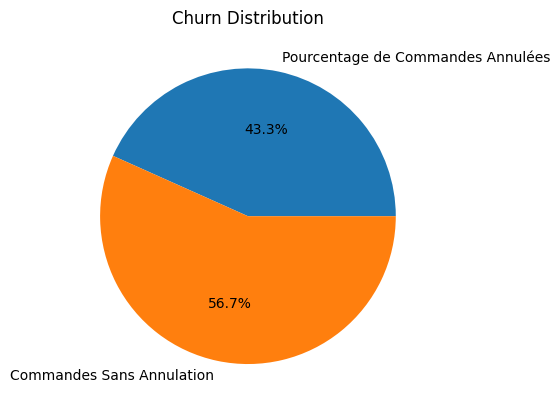

In [37]:
# Calculer le nombre de clients avec churn et sans churn
with_churn = len(df_churn_custmer[df_churn_custmer["pourcentage"] > 0])
without_churn = len(df_churn_custmer[df_churn_custmer["pourcentage"] == 0])

# Créer les données pour le graphique
churn_data = [with_churn, without_churn]
labels = ["Pourcentage de Commandes Annulées", "Commandes Sans Annulation"]

# Créer le graphique circulaire
plt.pie(churn_data, labels=labels, autopct='%1.1f%%')

# Définir le titre du graphique
plt.title("Churn Distribution")

# Afficher le graphique
plt.show()

/tmp/ipykernel_51440/2401055724.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_churn['refund_percentage'] = (significant_churn['refund_amount'].abs() / total_refunds) * 100


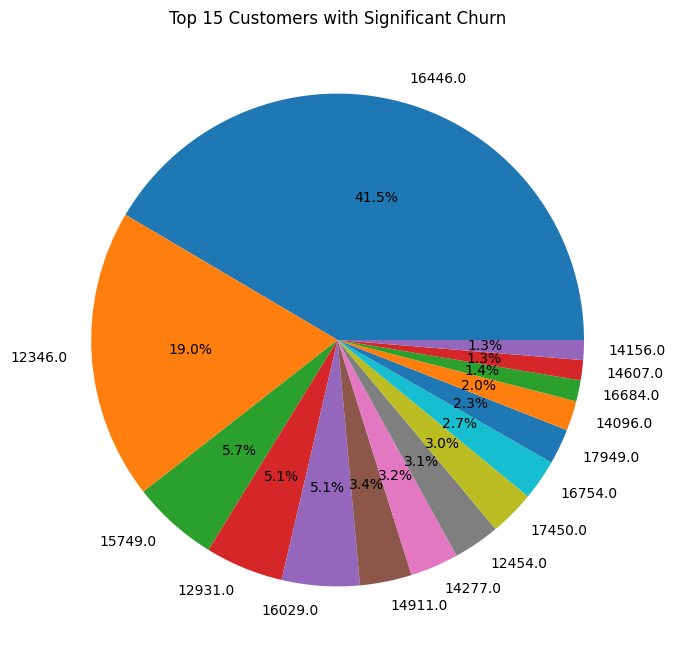

In [57]:
# Sélectionner les clients avec un churn significatif (valeur absolue)
significant_churn = desc_prcnt[desc_prcnt['refund_amount'] < 0]

# Calculer le total des remboursements
total_refunds = significant_churn['refund_amount'].abs().sum()

# Calculer le pourcentage de remboursement pour chaque client
significant_churn['refund_percentage'] = (significant_churn['refund_amount'].abs() / total_refunds) * 100

# Trier les clients par ordre décroissant de pourcentage de remboursement
significant_churn = significant_churn.sort_values('refund_percentage', ascending=False)

# Limiter le nombre de clients affichés dans le graphe
top_n = 15
significant_churn = significant_churn.head(top_n)

# Créer le pie chart
plt.figure(figsize=(8, 8))
plt.pie(significant_churn['refund_percentage'], labels=significant_churn['customer_id'], autopct='%1.1f%%')
plt.title('Top {} Customers with Significant Churn'.format(top_n))
plt.show()

### <font color="green"> ||| - Categorical Variable Analysis : </font>

In [28]:
descr_quant = data.groupby("description").agg({"quantity": "sum"}).sort_values("quantity", ascending=False)

In [29]:
descr_quant.head(15)

,quantity
description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,104546
WHITE HANGING HEART T-LIGHT HOLDER,91026
ASSORTED COLOUR BIRD ORNAMENT,79579
JUMBO BAG RED RETROSPOT,76514
BROCADE RING PURSE,69639
PACK OF 60 PINK PAISLEY CAKE CASES,55842
60 TEATIME FAIRY CAKE CASES,53678
SMALL POPCORN HOLDER,48234
PACK OF 72 RETROSPOT CAKE CASES,47695


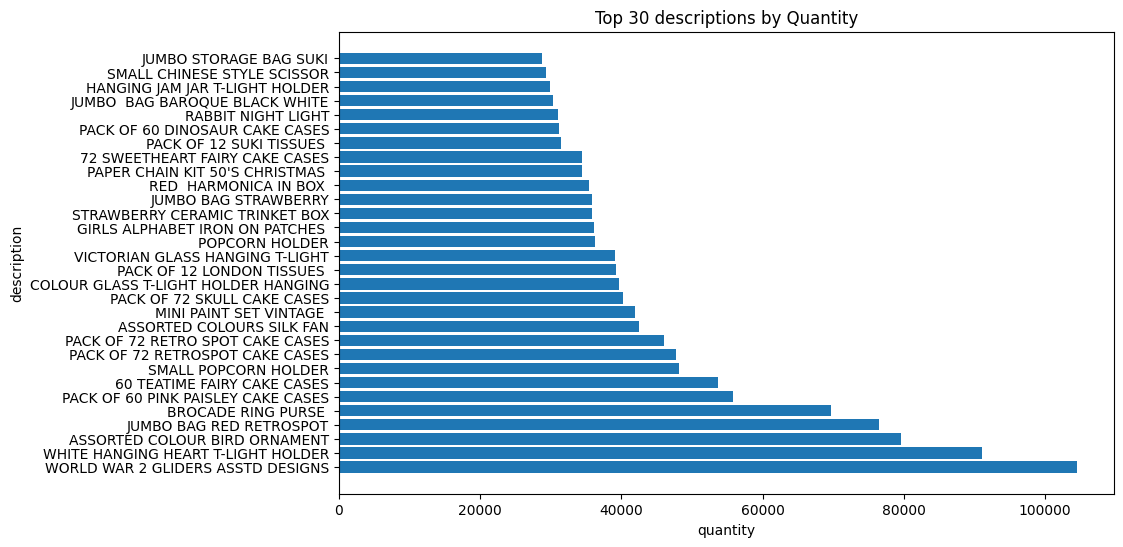

In [31]:
top_n = 30  # Adjust the number of bars to show

top_descriptions = descr_quant.head(top_n)
plt.figure(figsize=(10, 6))
plt.barh(top_descriptions.index, top_descriptions['quantity'])
plt.xlabel('quantity')
plt.ylabel('description')
plt.title('Top {} descriptions by Quantity'.format(top_n))
plt.show()

In [33]:
country_cust_data=data[['country','customer_id']].drop_duplicates()
country_cust_data.groupby(['country'])['customer_id'].aggregate('count').reset_index().sort_values('customer_id', ascending=False)

,country,customer_id
40,United Kingdom,5410
15,Germany,107
14,France,95
34,Spain,41
3,Belgium,29
30,Portugal,24
26,Netherlands,23
36,Switzerland,22
35,Sweden,19
20,Italy,17


In [ ]:
# array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
#        'Germany', nan, 'Portugal', 'Japan', 'Denmark'], dtype=object)

In [67]:
data[data['country'] == 'Lebanon']

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
332864,522200,22139,RETRO SPOT TEA SET CERAMIC 11 PC,3,2010-09-13 11:58:00,4.95,NaN,Lebanon
332865,522200,22381,TOY TIDY PINK RETROSPOT,5,2010-09-13 11:58:00,2.10,NaN,Lebanon
332866,522200,84078A,SET/4 WHITE RETRO STORAGE CUBES,1,2010-09-13 11:58:00,39.95,NaN,Lebanon
332867,522200,22327,ROUND SNACK BOXES SET OF 4 SKULLS,6,2010-09-13 11:58:00,2.95,NaN,Lebanon
332868,522200,22384,LUNCH BAG PINK RETROSPOT,10,2010-09-13 11:58:00,1.65,NaN,Lebanon
332869,522200,22473,TV DINNER TRAY VINTAGE PAISLEY,3,2010-09-13 11:58:00,4.95,NaN,Lebanon
332870,522200,22475,SKULL DESIGN TV DINNER TRAY,3,2010-09-13 11:58:00,4.95,NaN,Lebanon
332871,522200,22557,PLASTERS IN TIN VINTAGE PAISLEY,12,2010-09-13 11:58:00,1.65,NaN,Lebanon
332872,522200,20727,LUNCH BAG BLACK SKULL.,10,2010-09-13 11:58:00,1.65,NaN,Lebanon
332873,522200,22380,TOY TIDY SPACEBOY,5,2010-09-13 11:58:00,2.10,NaN,Lebanon


In [68]:
data[data['country'] == 'Nigeria']

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
6297,C489881,21102,"CANDLE IN JAR COLLAGE , VANILLA",-31,2009-12-02 16:20:00,2.55,NaN,Nigeria
6298,C489881,72802A,ROSE SCENT CANDLE IN JEWELLED BOX,-16,2009-12-02 16:20:00,4.25,NaN,Nigeria
70299,495795,ADJUST,Adjustment by john on 26/01/2010 17,1,2010-01-26 17:23:00,27.82,15702.0,Nigeria
308941,519827,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,1,2010-08-20 14:50:00,2.55,15702.0,Nigeria
308942,519827,22618,COOKING SET RETROSPOT,1,2010-08-20 14:50:00,9.95,15702.0,Nigeria
308943,519827,22621,TRADITIONAL KNITTING NANCY,1,2010-08-20 14:50:00,1.45,15702.0,Nigeria
308944,519827,22619,SET OF 6 SOLDIER SKITTLES,1,2010-08-20 14:50:00,3.75,15702.0,Nigeria
308945,519827,22620,4 TRADITIONAL SPINNING TOPS,1,2010-08-20 14:50:00,1.25,15702.0,Nigeria
308946,519827,21891,TRADITIONAL WOODEN SKIPPING ROPE,1,2010-08-20 14:50:00,1.25,15702.0,Nigeria
308947,519827,21892,TRADITIONAL WOODEN CATCH CUP GAME,1,2010-08-20 14:50:00,1.25,15702.0,Nigeria


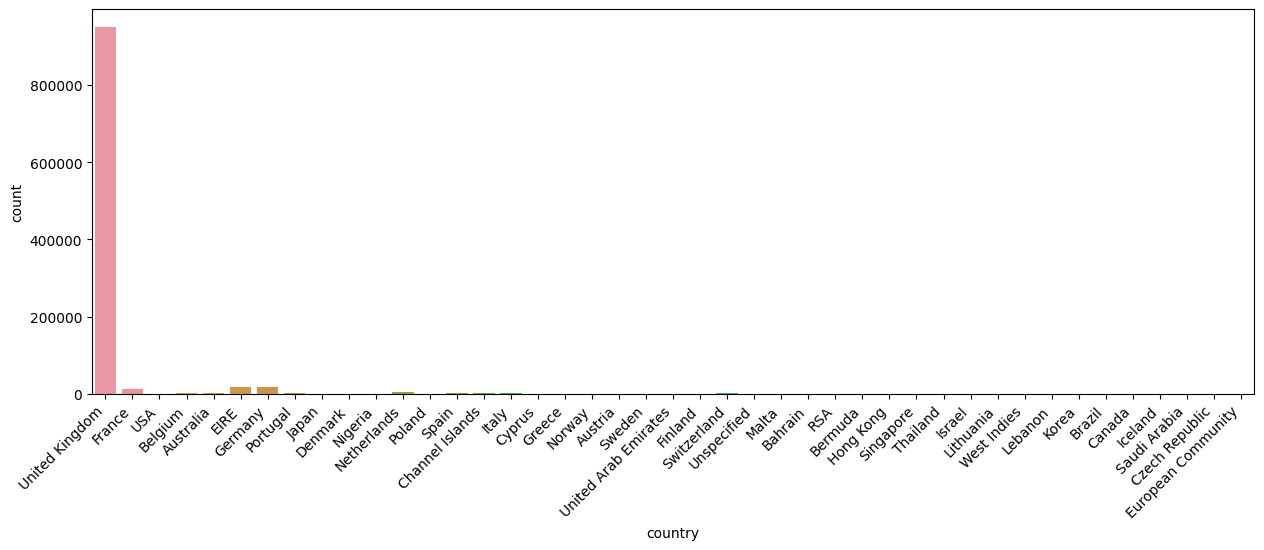

In [34]:
def cat_summary(dataframe, col_name, plot=False):
    if plot:
        fig_dims = (15, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation = 45, ha = 'right')
        plt.show()

cat_summary(data, "country", plot=True)

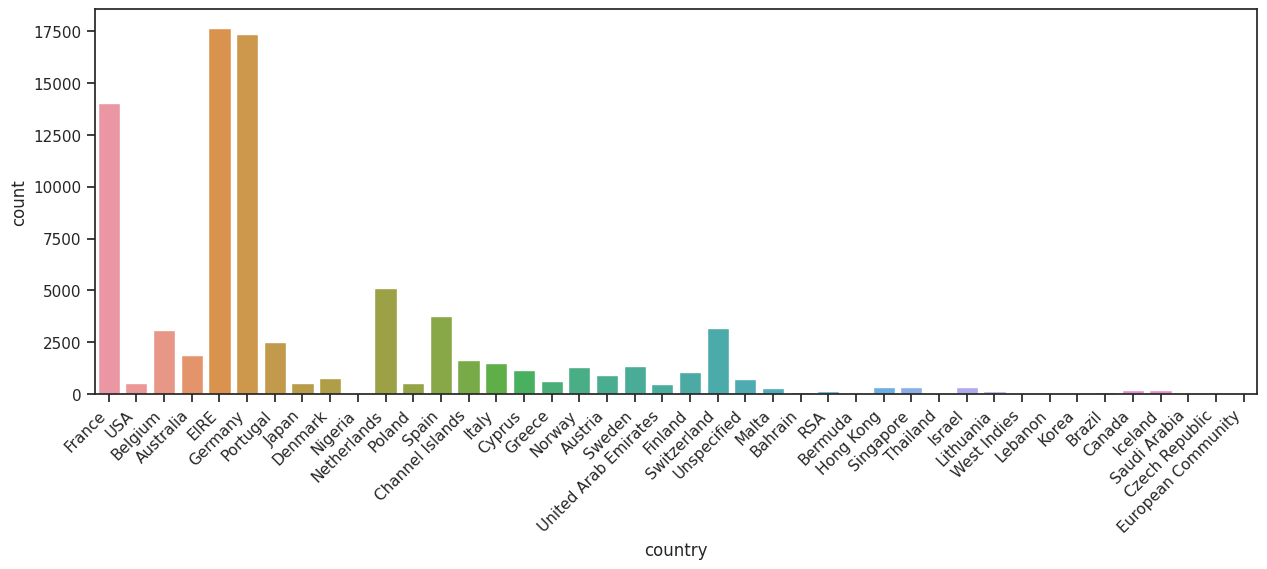

In [97]:
def cat_summary(dataframe, col_name, plot=False):
    if plot:
        fig_dims = (15, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        filtered_data = dataframe[dataframe[col_name] != 'United Kingdom']
        sns.countplot(x=col_name, data=filtered_data)
        plt.xticks(rotation=45, ha='right')
        plt.show()

cat_summary(data, "country", plot=True)

#### Mixed variables

### Recency vs Frequency

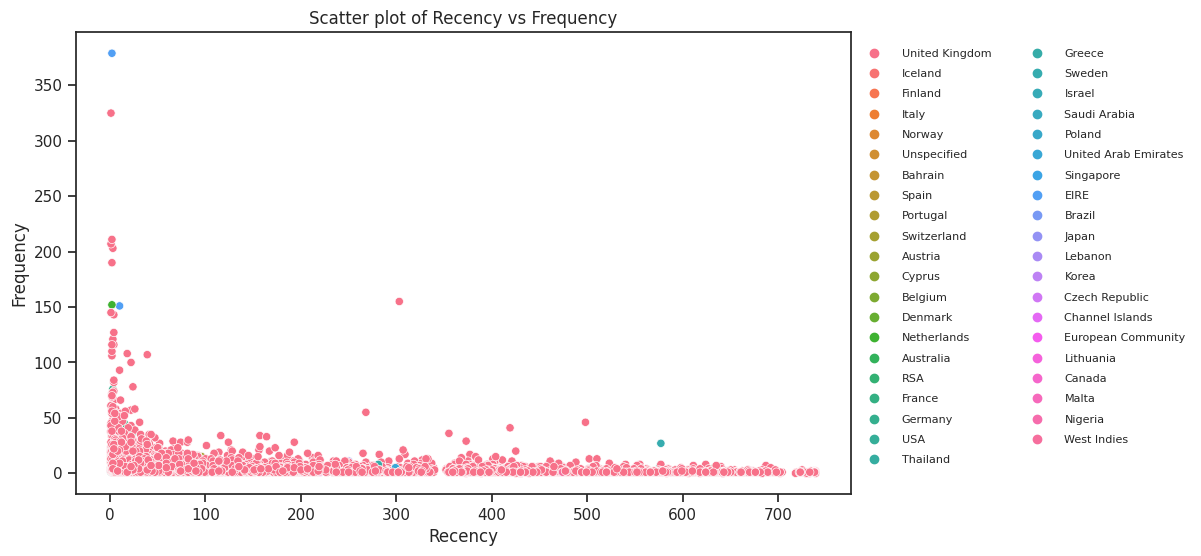

In [80]:
# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Créer un nuage de points pour les variables numériques
sns.scatterplot(data=mixed_data, x='recency', y='frequency', hue='country')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Scatter plot of Recency vs Frequency')

# Légende
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = [label for handle, label in zip(handles, labels) if label]

# Adapter la taille de la légende
leg = plt.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.45, 1), ncol=2)

# Réduire la taille de la légende
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(None)
for text in leg.get_texts():
    text.set_fontsize(8)

plt.show()

### Recency vs Monetary

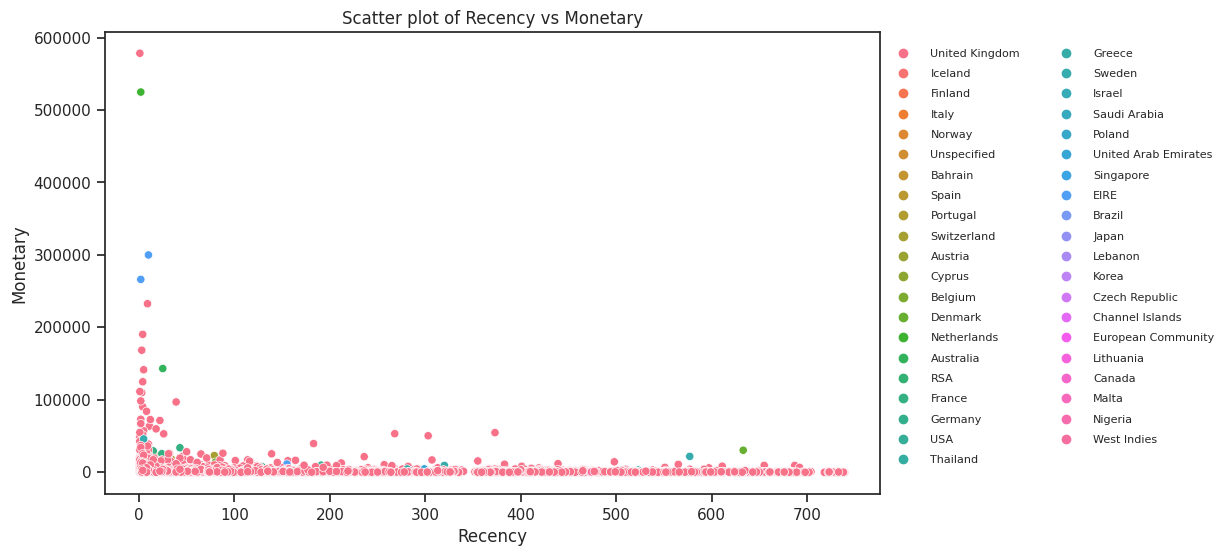

In [81]:
# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Créer un nuage de points pour les variables numériques
sns.scatterplot(data=mixed_data, x='recency', y='monetary', hue='country')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Scatter plot of Recency vs Monetary')

# Légende
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = [label for handle, label in zip(handles, labels) if label]

# Adapter la taille de la légende
leg = plt.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.45, 1), ncol=2)

# Réduire la taille de la légende
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(None)
for text in leg.get_texts():
    text.set_fontsize(8)

plt.show()

### Frequency vs Monetary

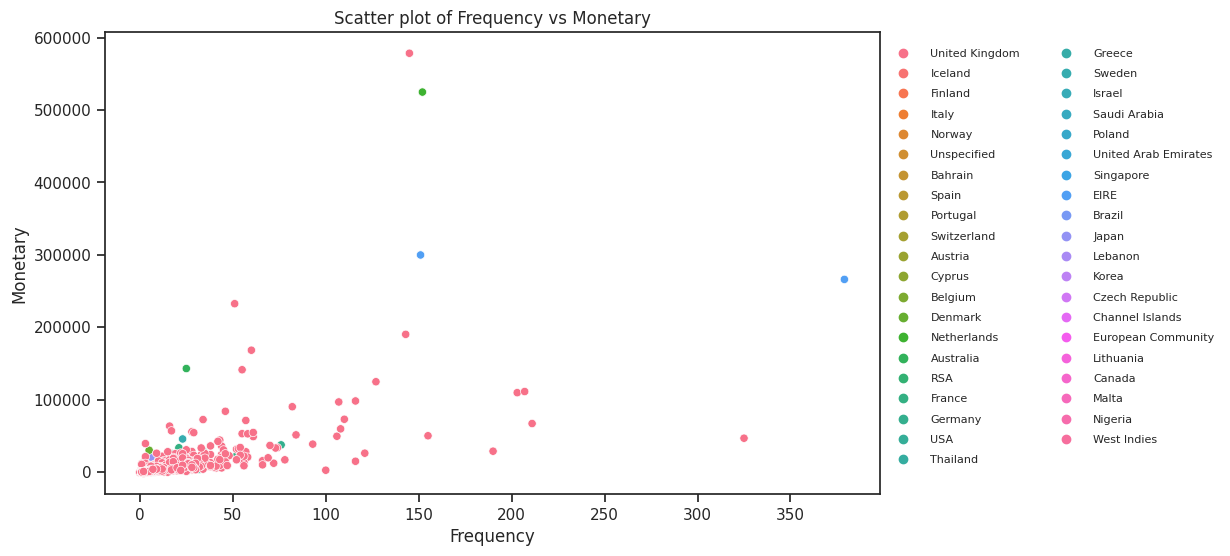

In [82]:
# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Créer un nuage de points pour les variables numériques
sns.scatterplot(data=mixed_data, x='frequency', y='monetary', hue='country')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Scatter plot of Frequency vs Monetary')

# Légende
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = [label for handle, label in zip(handles, labels) if label]

# Adapter la taille de la légende
leg = plt.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.45, 1), ncol=2)

# Réduire la taille de la légende
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(None)
for text in leg.get_texts():
    text.set_fontsize(8)

plt.show()

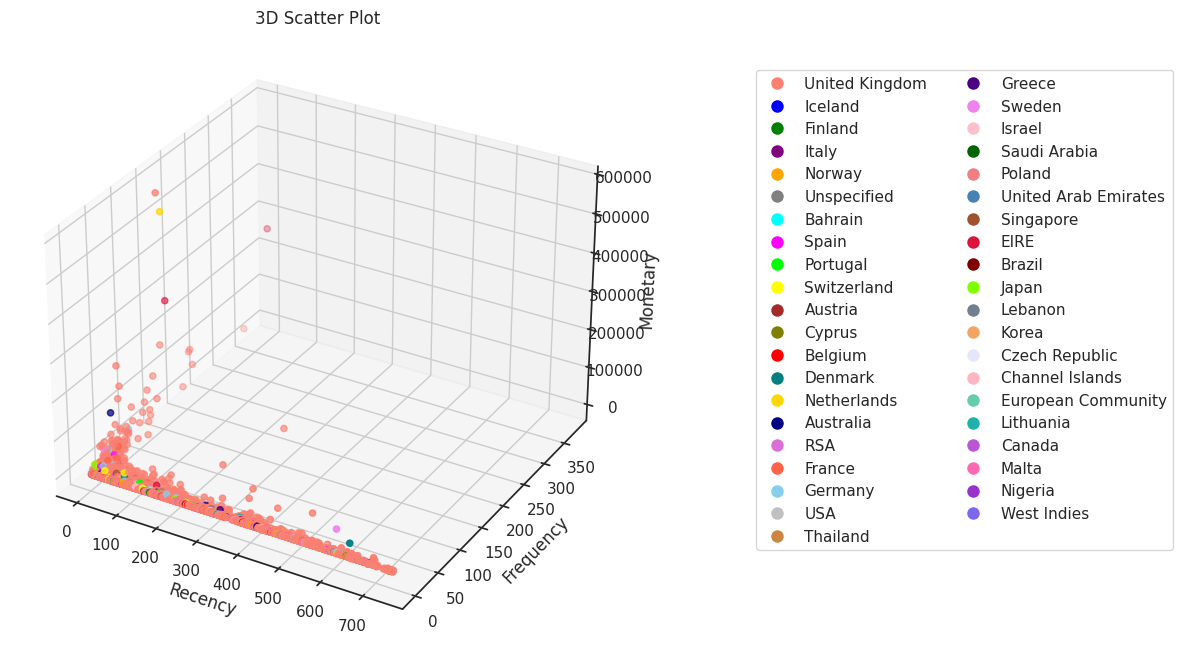

In [109]:
from mpl_toolkits.mplot3d import Axes3D

country_colors = {
    'United Kingdom': 'salmon', 'Iceland': 'blue', 'Finland': 'green', 'Italy': 'purple',
    'Norway': 'orange', 'Unspecified': 'gray', 'Bahrain': 'cyan', 'Spain': 'magenta', 'Portugal': 'lime',
    'Switzerland': 'yellow', 'Austria': 'brown', 'Cyprus': 'olive', 'Belgium': 'red',
    'Denmark': 'teal','Netherlands': 'gold','Australia': 'navy',
    'RSA': 'orchid','France': 'tomato','Germany': 'skyblue','USA': 'silver',
    'Thailand': 'peru','Greece': 'indigo','Sweden': 'violet',
    'Israel': 'pink','Saudi Arabia': 'darkgreen','Poland': 'lightcoral',
    'United Arab Emirates': 'steelblue', 'Singapore': 'sienna', 'EIRE': 'crimson',
    'Brazil': 'maroon', 'Japan': 'chartreuse', 'Lebanon': 'slategray',
    'Korea': 'sandybrown', 'Czech Republic': 'lavender', 'Channel Islands': 'lightpink',
    'European Community': 'mediumaquamarine', 'Lithuania': 'lightseagreen', 'Canada': 'mediumorchid',
    'Malta': 'hotpink', 'Nigeria': 'darkorchid', 'West Indies': 'mediumslateblue'
}


# Ajouter une colonne de couleurs basée sur le pays dans le dataframe mixed_data
mixed_data['color'] = mixed_data['country'].map(country_colors)

# Définir la taille de la figure
fig = plt.figure(figsize=(12, 8))

# Créer un axe 3D
ax = fig.add_subplot(111, projection='3d')

# Créer un graphique de dispersion en 3D avec les variables numériques et les couleurs des pays
scatter = ax.scatter(mixed_data['recency'], mixed_data['frequency'], mixed_data['monetary'], c=mixed_data['color'])

# Configurer les axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot')

# Créer une légende séparée
legend_labels = list(country_colors.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in country_colors.values()]
plt.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.9, 0.95) , ncol=2)


# Afficher le graphique
plt.show()

In [121]:
import plotly.express as px
import plotly.graph_objects as go

country_colors = {
    'United Kingdom': 'salmon', 'Iceland': 'blue', 'Finland': 'green', 'Italy': 'purple',
    'Norway': 'orange', 'Unspecified': 'gray', 'Bahrain': 'cyan', 'Spain': 'magenta', 'Portugal': 'lime',
    'Switzerland': 'yellow', 'Austria': 'brown', 'Cyprus': 'olive', 'Belgium': 'red',
    'Denmark': 'teal','Netherlands': 'gold','Australia': 'navy',
    'RSA': 'orchid','France': 'tomato','Germany': 'skyblue','USA': 'silver',
    'Thailand': 'peru','Greece': 'indigo','Sweden': 'violet',
    'Israel': 'pink','Saudi Arabia': 'darkgreen','Poland': 'lightcoral',
    'United Arab Emirates': 'steelblue', 'Singapore': 'sienna', 'EIRE': 'crimson',
    'Brazil': 'maroon', 'Japan': 'chartreuse', 'Lebanon': 'slategray',
    'Korea': 'sandybrown', 'Czech Republic': 'lavender', 'Channel Islands': 'lightpink',
    'European Community': 'mediumaquamarine', 'Lithuania': 'lightseagreen', 'Canada': 'mediumorchid',
    'Malta': 'hotpink', 'Nigeria': 'darkorchid', 'West Indies': 'mediumslateblue'
}


# Add a color column based on country in the mixed_data dataframe
mixed_data['color'] = mixed_data['country'].map(country_colors)

# Create a 3D scatter plot with the numeric variables and country colors
fig = go.Figure(data=[go.Scatter3d(
    x=mixed_data['recency'],
    y=mixed_data['frequency'],
    z=mixed_data['monetary'],
    mode='markers',
    marker=dict(
        color=mixed_data['color'],
        size=5
    )
)])

# Set the axes titles and plot title
fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    title='3D Scatter Plot',
    width=1000,  # Adjust the width of the figure
    height=800  # Adjust the height of the figure
)

# Create a custom legend
legend_labels = list(country_colors.keys())
legend_trace = [go.Scatter3d(
    x=[None],
    y=[None],
    z=[None],
    mode='markers',
    marker=dict(
        color=[country_colors[label] for label in legend_labels],
        size=5
    ),
    showlegend=True,
    name='Countries'
)]
fig.add_trace(legend_trace[0])

# Show the interactive plot
fig.show()


##### <font color="yellow"> Remarques :  </font>